## EDA ON Text Data

## E-Commerce Clothing Reviews 

Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.
    
Age: Positive Integer variable of the reviewers age.

Title: String variable for the title of the review.

Review Text: String variable for the review body.

Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.

Division Name: Categorical name of the product high level division.

Department Name: Categorical name of the product department name.

Class Name: Categorical name of the product class name.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from plotly.offline import iplot
import plotly as py

In [3]:
import cufflinks as cf

In [4]:
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [5]:
df = pd.read_csv(r'C:\Users\Rohin\Documents\E-Commerce Clothing Reviews.csv',index_col=0)

In [6]:
df.head()

Clothing ID  Age                    Title  \
0          767   33                      NaN   
1         1080   34                      NaN   
2         1077   60  Some major design flaws   
3         1049   50         My favorite buy!   
4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

In [7]:
df.drop(labels=['Title','Clothing ID'], axis=1,inplace=True)

In [8]:
df.head()

Age                                        Review Text  Rating  \
0   33  Absolutely wonderful - silky and sexy and comf...       4   
1   34  Love this dress!  it's sooo pretty.  i happene...       5   
2   60  I had such high hopes for this dress and reall...       3   
3   50  I love, love, love this jumpsuit. it's fun, fl...       5   
4   47  This shirt is very flattering to all due to th...       5   

   Recommended IND  Positive Feedback Count   Division Name Department Name  \
0                1                        0       Initmates        Intimate   
1                1                        4         General         Dresses   
2                0                        0         General         Dresses   
3                1                        0  General Petite         Bottoms   
4                1                        6         General            Tops   

  Class Name  
0  Intimates  
1    Dresses  
2    Dresses  
3      Pants  
4    Blouses

In [9]:
df.isnull().sum()

Age                          0
Review Text                845
Rating                       0
Recommended IND              0
Positive Feedback Count      0
Division Name               14
Department Name             14
Class Name                  14
dtype: int64

In [10]:
df.dropna(subset=['Review Text','Division Name'], inplace=True)

In [11]:
df.isnull().sum()

Age                        0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [12]:
df.head()

Age                                        Review Text  Rating  \
0   33  Absolutely wonderful - silky and sexy and comf...       4   
1   34  Love this dress!  it's sooo pretty.  i happene...       5   
2   60  I had such high hopes for this dress and reall...       3   
3   50  I love, love, love this jumpsuit. it's fun, fl...       5   
4   47  This shirt is very flattering to all due to th...       5   

   Recommended IND  Positive Feedback Count   Division Name Department Name  \
0                1                        0       Initmates        Intimate   
1                1                        4         General         Dresses   
2                0                        0         General         Dresses   
3                1                        0  General Petite         Bottoms   
4                1                        6         General            Tops   

  Class Name  
0  Intimates  
1    Dresses  
2    Dresses  
3      Pants  
4    Blouses

# Text Cleaning

In [14]:
contractions = contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [15]:
def cont_to_exp(x):
    if type(x) is str:
        x = x.replace('\\','')
        for key in contractions:
            value = contractions[key]
            x = x.replace(key,value)
        return x
    else:
        return x
        

In [16]:
df['Review Text']

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
2        I had such high hopes for this dress and reall...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
                               ...                        
23481    I was very happy to snag this dress at such a ...
23482    It reminds me of maternity clothes. soft, stre...
23483    This fit well, but the top was very see throug...
23484    I bought this dress for a wedding i have this ...
23485    This dress in a lovely platinum is feminine an...
Name: Review Text, Length: 22628, dtype: object

# Feature Engineering
- In this process we will be calculating the features before visualization

In [19]:
from textblob import TextBlob

In [20]:
df['Polarity'] = df['Review Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [21]:
df['review_len'] = df['Review Text'].apply(lambda x: len(x))

In [22]:
df['word_count'] = df['Review Text'].apply(lambda x: len(x.split()))

In [23]:
## create function for finding average length of words per row

def get_avg_word_len(x):
    words = x.split()
    word_len = 0
    for word in words:
        word_len = word_len + len(word)
        
    return word_len / len(words)

In [24]:
df['avg_word_len'] = df['Review Text'].apply(lambda x: get_avg_word_len(x))

In [25]:
df.head()

Age                                        Review Text  Rating  \
0   33  Absolutely wonderful - silky and sexy and comf...       4   
1   34  Love this dress!  it's sooo pretty.  i happene...       5   
2   60  I had such high hopes for this dress and reall...       3   
3   50  I love, love, love this jumpsuit. it's fun, fl...       5   
4   47  This shirt is very flattering to all due to th...       5   

   Recommended IND  Positive Feedback Count   Division Name Department Name  \
0                1                        0       Initmates        Intimate   
1                1                        4         General         Dresses   
2                0                        0         General         Dresses   
3                1                        0  General Petite         Bottoms   
4                1                        6         General            Tops   

  Class Name  Polarity  review_len  word_count  avg_word_len  
0  Intimates  0.633333          53           8      5.750000  
1    Dresses  0.339583         303          62      3.822581  
2    Dresses  0.073675         500          98      4.112245  
3      Pants  0.550000         124          22      4.681818  
4    Blouses  0.512891         192          36      4.361111


# Distribution of Sentiment Polarity

In [26]:
df['Polarity'].iplot(kind = "hist", colors = 'red', bins = 50,
                     xTitle = 'Polarity', yTitle = 'Count', title = 'Sentiment Polarity Distribution')

# Distribution of Reviews Rating and Reviewers Age

In [27]:
df['Rating'].iplot(kind = 'hist' , xTitle = 'Rating' , yTitle = 'Count' ,
                  title = 'Review Rating Distribution')

In [28]:
df['Age'].iplot(kind = 'hist' , bins = 40 , xTitle = 'Age' , yTitle = 'Count' ,
               title = 'Reviewers Age Distribution' , colors = 'yellow' , linecolor = 'black')

# Distribution of Review Text Length and Word Length

In [29]:
df['review_len'].iplot(kind = 'hist' , xTitle = 'Review Length' , yTitle = 'Count' ,
                      title = 'Review Text Length Distribution' , colors = 'red' ,
                      linecolor = 'black')

In [30]:
df['word_count'].iplot(kind = 'hist' , xTitle = 'Number of Words' , yTitle = 'Count' ,
                      title = 'Word Count Distribution' , linecolor = 'black')

In [31]:


df['avg_word_len'].iplot(kind = 'hist' , xTitle = 'Average' , yTitle = 'Count' ,
                        title = 'Review Text Average Word Length')

# Distribution of Department, Division, and Class

In [32]:
df.groupby('Department Name')

In [33]:
##  We are using inbuilt function value_counts() for finding total values for each group

df['Department Name'].value_counts()

Tops        10048
Dresses      6145
Bottoms      3662
Intimate     1653
Jackets      1002
Trend         118
Name: Department Name, dtype: int64

In [34]:
df['Department Name'].value_counts().iplot(kind = 'bar' , xTitle = 'Department' , yTitle = 'Count' ,
                                          title = "Bar Chart of Department's Name")

In [35]:
df['Division Name'].value_counts().iplot(kind = 'bar' , xTitle = 'Division' , yTitle = 'Count' ,
                                         title = "Bar Chart of Division's Name")

In [36]:
df['Class Name'].value_counts().iplot(kind = 'bar' , xTitle = 'Class' , yTitle = 'Count' ,
                                     title = "Bar Chart of Classe's Name")

# Distribution of Unigram, Bigram and Trigram

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

In [38]:
## Actual function 

def get_top_n_words(x, n):
    vec = CountVectorizer().fit(x)
    bow = vec.transform(x)
    sum_of_words = bow.sum(axis = 0)
    words_freq = [(words, sum_of_words[0,idx]) for words , idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x : x[1], reverse=True)
    return words_freq[:n]

# Distribution of Unigram, Bigram and Trigram without Stop Words

### Stop Words are nothing but, the words like this,what,if,is,etc..

## Unigram analysis without Stopword

In [39]:
## Actual function 

def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(1, 1) , stop_words = 'english').fit(x)
    bow = vec.transform(x)
    sum_of_words = bow.sum(axis = 0)
    words_freq = [(words, sum_of_words[0,idx]) for words , idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x : x[1], reverse=True)
    return words_freq[:n]

In [40]:
review_freq = get_top_n_words(df['Review Text'], 20)

In [41]:
review_freq

[('dress', 10567),
 ('love', 8945),
 ('size', 8770),
 ('fit', 7322),
 ('like', 7148),
 ('wear', 6434),
 ('great', 6114),
 ('just', 5604),
 ('fabric', 4797),
 ('small', 4726),
 ('color', 4604),
 ('look', 4039),
 ('really', 3924),
 ('ordered', 3850),
 ('little', 3773),
 ('perfect', 3772),
 ('flattering', 3519),
 ('soft', 3336),
 ('comfortable', 3058),
 ('cute', 3042)]

In [42]:
# converting review_freq into **dataframe** for visualization

df1 = pd.DataFrame(review_freq, columns = ['Unigram', 'Frequency'])
df1 = df1.set_index('Unigram')
df1.iplot(kind = 'bar' , xTitle = 'Unigram' , yTitle = 'Count', title = 'Top 20 Unigram Words')

##  Bigram analysis without Stopword

In [43]:
## Actual function 

def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(2, 2) , stop_words = 'english').fit(x)
    bow = vec.transform(x)
    sum_of_words = bow.sum(axis = 0)
    words_freq = [(words, sum_of_words[0,idx]) for words , idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x : x[1], reverse=True)
    return words_freq[:n]

In [44]:
review_freq = get_top_n_words(df['Review Text'], 20)

In [45]:
review_freq

[('true size', 1347),
 ('love dress', 766),
 ('usually wear', 691),
 ('looks great', 620),
 ('fit perfectly', 609),
 ('size small', 540),
 ('fits perfectly', 489),
 ('usual size', 479),
 ('look like', 425),
 ('just right', 423),
 ('ordered size', 375),
 ('love love', 374),
 ('looks like', 373),
 ('runs large', 367),
 ('super cute', 363),
 ('highly recommend', 363),
 ('wear size', 361),
 ('fabric soft', 350),
 ('feel like', 349),
 ('fit great', 347)]

In [46]:
# converting review_freq into **dataframe** for visualization

df1 = pd.DataFrame(review_freq, columns = ['Bigram', 'Frequency'])
df1 = df1.set_index('Bigram')
df1.iplot(kind = 'bar' , xTitle = 'Bigram' , yTitle = 'Count', title = 'Top 20 Bigram Words' ,
         color = 'lightgreen')

# Trigram analysis without Stopword

In [47]:
## Actual function 

def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(3, 3) , stop_words='english').fit(x)
    bow = vec.transform(x)
    sum_of_words = bow.sum(axis = 0)
    words_freq = [(words, sum_of_words[0,idx]) for words , idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x : x[1], reverse=True)
    return words_freq[:n]

In [48]:
review_freq = get_top_n_words(df['Review Text'], 20)

In [49]:
review_freq

[('fits true size', 280),
 ('fit true size', 229),
 ('runs true size', 148),
 ('love love love', 143),
 ('usually wear size', 136),
 ('ordered usual size', 107),
 ('does run large', 95),
 ('really wanted love', 94),
 ('wanted love dress', 88),
 ('usually wear small', 80),
 ('small fit perfectly', 77),
 ('looks great jeans', 70),
 ('fit like glove', 69),
 ('usually wear medium', 68),
 ('normally wear size', 68),
 ('small fits perfectly', 65),
 ('size fit perfectly', 65),
 ('fits like glove', 65),
 ('usual size small', 64),
 ('usually wear xs', 63)]

In [50]:
# converting review_freq into **dataframe** for visualization

df1 = pd.DataFrame(review_freq, columns = ['Trigram', 'Frequency'])
df1 = df1.set_index('Trigram')
df1.iplot(kind = 'bar' , xTitle = 'Trigram' , yTitle = 'Count', title = 'Top 20 Trigram Words',
         color = 'lightviolet')

# Distribution of Top 20 Parts-of-Speech POS Tags

In [51]:
import nltk

In [52]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rohin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Rohin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [53]:
## Use **TextBlob** package fot solving tasks such as 'parts of speech tagging', 'noun phrase extraction' ,'sentiment analysis',etc

blob = TextBlob(str(df['Review Text']))

In [54]:
blob

TextBlob("0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
2        I had such high hopes for this dress and reall...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
                               ...                        
23481    I was very happy to snag this dress at such a ...
23482    It reminds me of maternity clothes. soft, stre...
23483    This fit well, but the top was very see throug...
23484    I bought this dress for a wedding i have this ...
23485    This dress in a lovely platinum is feminine an...
Name: Review Text, Length: 22628, dtype: object")

In [55]:
nltk.download('tagsets')

[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\Rohin\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

In [56]:
## This statement is used to provide all tags with their abbrevation

nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [57]:
blob.tags

[('0', 'CD'),
 ('Absolutely', 'RB'),
 ('wonderful', 'JJ'),
 ('silky', 'NN'),
 ('and', 'CC'),
 ('sexy', 'NN'),
 ('and', 'CC'),
 ('comf', 'NN'),
 ('1', 'CD'),
 ('Love', 'NNP'),
 ('this', 'DT'),
 ('dress', 'NN'),
 ('it', 'PRP'),
 ("'s", 'VBZ'),
 ('sooo', 'JJ'),
 ('pretty', 'RB'),
 ('i', 'JJ'),
 ('happene', 'NN'),
 ('2', 'CD'),
 ('I', 'PRP'),
 ('had', 'VBD'),
 ('such', 'JJ'),
 ('high', 'JJ'),
 ('hopes', 'NNS'),
 ('for', 'IN'),
 ('this', 'DT'),
 ('dress', 'NN'),
 ('and', 'CC'),
 ('reall', 'NN'),
 ('3', 'CD'),
 ('I', 'PRP'),
 ('love', 'VBP'),
 ('love', 'VBP'),
 ('love', 'VBP'),
 ('this', 'DT'),
 ('jumpsuit', 'NN'),
 ('it', 'PRP'),
 ("'s", 'VBZ'),
 ('fun', 'NN'),
 ('fl', 'NN'),
 ('4', 'CD'),
 ('This', 'DT'),
 ('shirt', 'NN'),
 ('is', 'VBZ'),
 ('very', 'RB'),
 ('flattering', 'JJ'),
 ('to', 'TO'),
 ('all', 'DT'),
 ('due', 'JJ'),
 ('to', 'TO'),
 ('th', 'VB'),
 ('23481', 'CD'),
 ('I', 'PRP'),
 ('was', 'VBD'),
 ('very', 'RB'),
 ('happy', 'JJ'),
 ('to', 'TO'),
 ('snag', 'VB'),
 ('this', 'DT'),
 ('d

In [58]:
## Convert blob variable into DataFrame 
## POS - Parts of Speech

pos_df = pd.DataFrame(blob.tags , columns = ['Words' , 'POS'])
pos_df

Words  POS
0             0   CD
1    Absolutely   RB
2     wonderful   JJ
3         silky   NN
4           and   CC
..          ...  ...
106        Text  NNP
107      Length  NNP
108       22628   CD
109       dtype   NN
110      object   NN

[111 rows x 2 columns]

In [59]:
## We are calculating total number of occurence of each parts os speech (POS)

pos_df = pos_df['POS'].value_counts()
pos_df

NN     25
DT     15
JJ     12
CD     11
PRP     8
RB      6
IN      5
VBZ     5
VBP     4
VBD     4
CC      4
NNP     4
TO      3
NNS     2
VB      2
PDT     1
Name: POS, dtype: int64

In [60]:
## Plotting pos_df value_counts

pos_df.iplot(kind = 'bar')

# Bivariate Analysis

In [61]:
df.head(2)

Age                                        Review Text  Rating  \
0   33  Absolutely wonderful - silky and sexy and comf...       4   
1   34  Love this dress!  it's sooo pretty.  i happene...       5   

   Recommended IND  Positive Feedback Count Division Name Department Name  \
0                1                        0     Initmates        Intimate   
1                1                        4       General         Dresses   

  Class Name  Polarity  review_len  word_count  avg_word_len  
0  Intimates  0.633333          53           8      5.750000  
1    Dresses  0.339583         303          62      3.822581

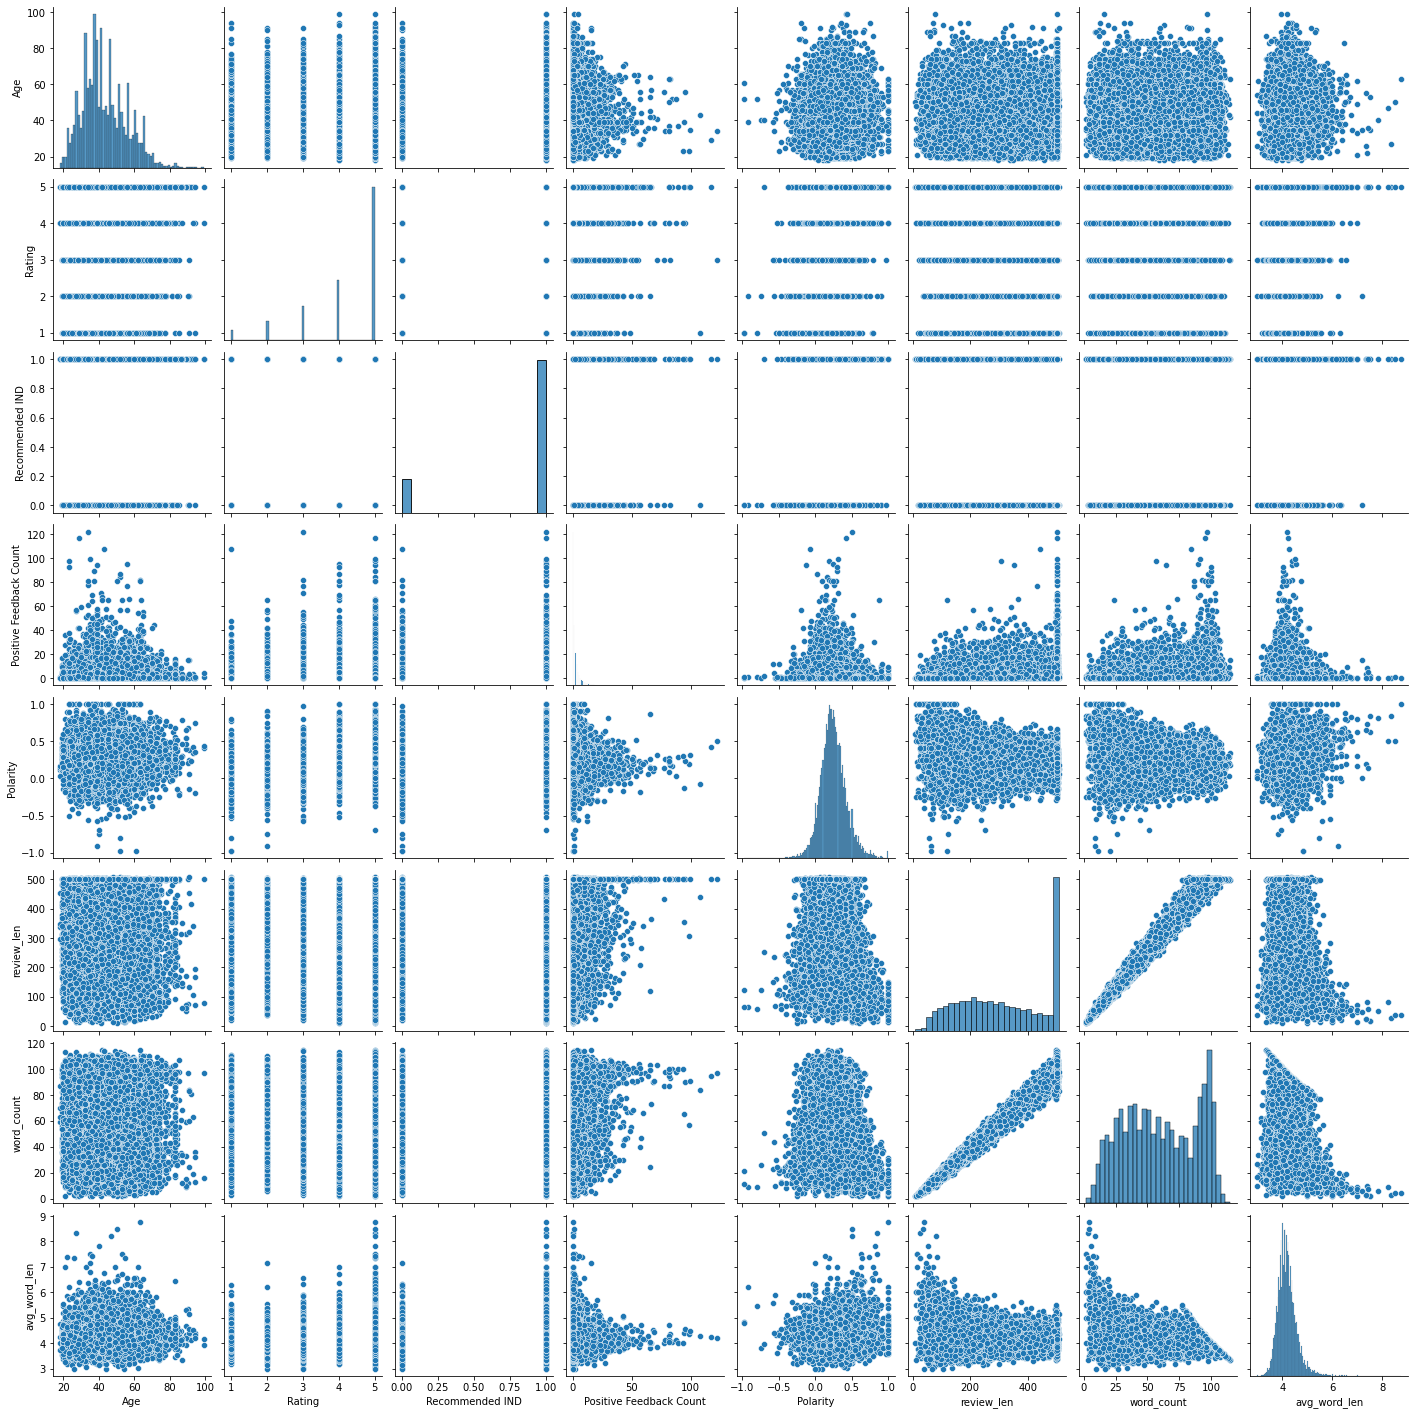

In [62]:
## We can have clear idea of all numerical datas with each columns

sns.pairplot(df)

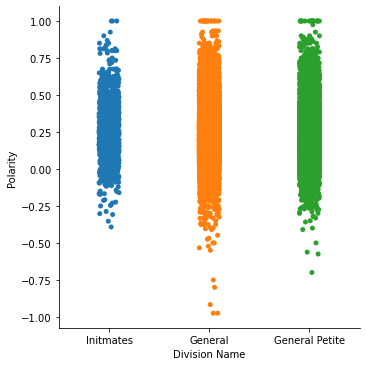

In [63]:
sns.catplot(x = 'Division Name' , y = 'Polarity' , data = df)

## Distribution of Sentiment Polarity of Reviews Based on the Recommendation

In [64]:
import plotly.express as px
import plotly.graph_objects as go

We are going to select table where there is **Recommended IND =1** for recommending the product to others and **Recommended IND =0** for not recommending the product

In [65]:
x1 = df[df['Recommended IND'] == 1]['Polarity']
x0 = df[df['Recommended IND'] == 0]['Polarity']
x1,x0

(0        0.633333
 1        0.339583
 3        0.550000
 4        0.512891
 6        0.133750
            ...   
 23479    0.211136
 23481    0.552667
 23482    0.091667
 23484    0.322222
 23485    0.413889
 Name: Polarity, Length: 18527, dtype: float64,
 2        0.073675
 5        0.178750
 10      -0.097149
 22      -0.045595
 25       0.261508
            ...   
 23449   -0.039583
 23450    0.215368
 23460    0.100370
 23478   -0.078788
 23483    0.414286
 Name: Polarity, Length: 4101, dtype: float64)

In [66]:
trace0 = go.Histogram(x = x0 , name = 'Not Recommended' , opacity = 0.7)
trace1 = go.Histogram(x = x1 , name = 'Recommended' , opacity = 0.7)

In [67]:
data = [trace0 , trace1]
layout = go.Layout(barmode = 'overlay' , title = 'Distribution of Sentiment Polarity of Reviews Based on the Recommendation')
fig = go.Figure(data = data , layout = layout)

iplot(fig)

From the above Plot we could clearly see that **customers who recommend the product also gives negative review and vice versa**

## Distribution of Ratings Based on the Recommendation

We are going to select table where there is **Recommended IND =1** for recommending the product to others and **Recommended IND =0** for not recommending the product

In [68]:
x1 = df[df['Recommended IND'] == 1]['Rating']
x0 = df[df['Recommended IND'] == 0]['Rating']
x1,x0

(0        4
 1        5
 3        5
 4        5
 6        5
         ..
 23479    5
 23481    5
 23482    3
 23484    3
 23485    5
 Name: Rating, Length: 18527, dtype: int64,
 2        3
 5        2
 10       3
 22       2
 25       3
         ..
 23449    3
 23450    3
 23460    3
 23478    1
 23483    3
 Name: Rating, Length: 4101, dtype: int64)

In [69]:
trace0 = go.Histogram(x = x0 , name = 'Not Recommended' , opacity = 0.7)
trace1 = go.Histogram(x = x1 , name = 'Recommended' , opacity = 0.7)

In [70]:
data = [trace0 , trace1]
layout = go.Layout(barmode = 'overlay' , title = 'Distribution of Reviews Rating Based on the Recommendation')
fig = go.Figure(data = data , layout = layout)

iplot(fig)

From the above Plot we could clearly see that **Rating with 5-stars full 100% recommend products whereas Ratings between (1,2) there no recommendation for products and Rating with 3-stars contains both subset of recommending and not-recommending**

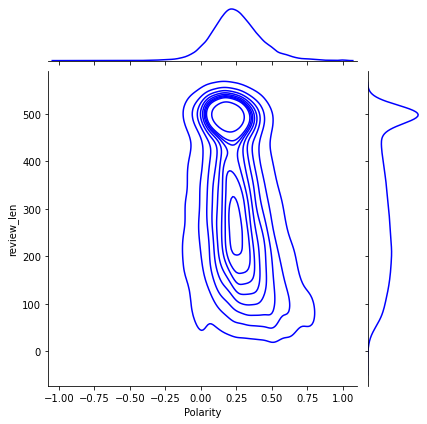

In [71]:
sns.jointplot(x = 'Polarity' , y = 'review_len' , data = df , kind = 'kde' , color = 'blue')

From above plot the **Polarity** is around **0.25** with **review-length** as **500**

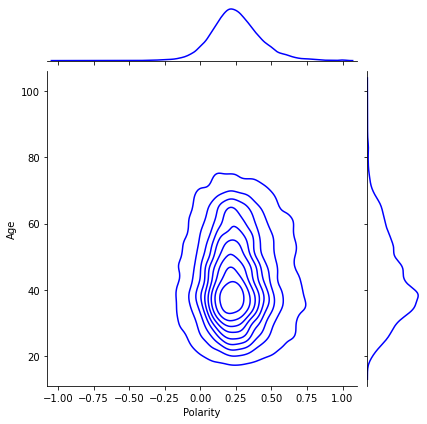

In [72]:
sns.jointplot(x = 'Polarity' , y = 'Age' , data = df , kind = 'kde' , color = 'blue')

From above plot the **Polarity** is around **0.25** with **Age** is in between **35 to 40**